## Team Member: Ziwei Zhao, Nazarat Hossain, Jenny Wang

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# Train/Test Split & Scaling

In [95]:
sales=pd.read_csv(r'C:\Users\nazar\Desktop\MScA\Machine_Learning\Project\ML_Data_V1.csv')
sales.head()

,Date,Net_Sales,Orders,Guests,Temperature,Precipitation,New_Snow,Snow_Depth
0,2/19/2015,3380.22,106,224,1.0,0.0,0.0,5
1,2/20/2015,4516.40,125,351,9.5,0.0,0.2,5
2,2/21/2015,5824.45,149,382,26.0,0.0,0.0,5
3,2/22/2015,4688.52,120,319,18.5,0.0,0.0,5
4,2/23/2015,2665.95,85,169,7.5,0.0,0.0,5


In [96]:
X = sales.iloc[:,2:]
X.shape

(1777, 6)

In [97]:
y = sales.iloc[:,1]
y = np.array(y).reshape(1777,1)
y.shape

(1777, 1)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
X_train.head()

,Orders,Guests,Temperature,Precipitation,New_Snow,Snow_Depth
438,76,164,50.5,0.00,0.0,0
198,147,338,78.0,0.00,0.0,0
15,126,329,17.0,0.00,0.0,7
265,96,184,49.5,0.42,0.0,0
543,105,227,72.5,0.00,0.0,0


In [100]:
scaler = StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)

[1.37762139e+02 2.87238564e+02 5.21323012e+01 1.21625616e-01
 9.35960591e-02 3.37086559e-01]


In [101]:
X_train_scaled = scaler.fit_transform(X_train)

In [102]:
X_test_scaled = scaler.transform(X_test)

# Regrerssion

### Assignment 2

#### Linear Regression with sklearn
#### Gradient Descent Mini-Batch
#### (1) When mini-batch size is 50
#### (2) When mini-batch size is 200
#### (3) When mini-batch size is 500
#### (6) When mini-batch size is 600
#### Support Vector Machine Linear Regression

# Linear Regression

In [104]:
# Create X dataframe
X = sales.iloc[:,1:-1]
X.head()

,Net_Sales,Orders,Guests,Temperature,Precipitation,New_Snow
0,3380.22,106,224,1.0,0.0,0.0
1,4516.40,125,351,9.5,0.0,0.2
2,5824.45,149,382,26.0,0.0,0.0
3,4688.52,120,319,18.5,0.0,0.0
4,2665.95,85,169,7.5,0.0,0.0


In [105]:
# Creaate Target/y dataframe
y = sales.iloc[:, -1]
y.head()

0    5
1    5
2    5
3    5
4    5
Name: Snow_Depth, dtype: int64

In [10]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print('Coefficients: \n', lin_reg.coef_)
print('Intercept: \n', lin_reg.intercept_)

Coefficients: 
 [[ 1.14562329e+03  5.66725320e+02 -5.08562005e+00  9.53241407e-01
  -1.72048825e+00  1.10310113e+00]]
Intercept: 
 [4850.24954961]


In [12]:
y_pred_sklearn = lin_reg.predict(X_test_scaled)

In [13]:
mean_squared_error(y_test, y_pred_sklearn)

260253.71792908933

In [14]:
r2_score(y_test, y_pred_sklearn)

0.9072284615821303

In [15]:
explained_variance_score(y_test, y_pred_sklearn)

0.9075434506601048

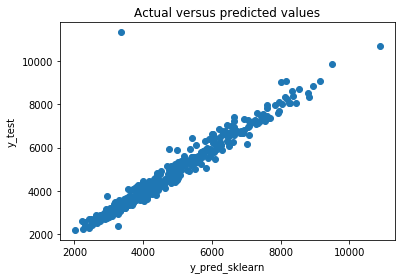

In [89]:
plt.scatter(y_pred_sklearn, y_test)
plt.title('Actual versus predicted values')
plt.xlabel('y_pred_sklearn')
plt.ylabel('y_test')
plt.show()

# Part D: Gradient Descent Mini-Batch

In [16]:
X_train.count()

Orders           1421
Guests           1421
Temperature      1421
Precipitation    1421
New_Snow         1421
Snow_Depth       1421
dtype: int64

In [17]:
X_test.count()

Orders           356
Guests           356
Temperature      356
Precipitation    356
New_Snow         356
Snow_Depth       356
dtype: int64

In [19]:
X_b = np.c_[np.ones((1421, 1)), X_train_scaled]
X_new_b = np.c_[np.ones((356, 1)), X_test_scaled]


### (1) When mini-batch size is 50

In [31]:
m = len(X_b)
n_iterations = 100
minibatch_size = 50

np.random.seed(42)
theta = np.random.randn(7,1)  

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = 0.01
        theta = theta - eta * gradients

In [28]:
theta

array([[ 4.85005964e+03],
       [ 1.14537606e+03],
       [ 5.65501520e+02],
       [-5.40120448e+00],
       [ 1.22371940e+00],
       [-1.80245258e-01],
       [ 1.76062533e+00]])

In [29]:
y_pred_gradient = X_new_b.dot(theta)
print('test data mean square error is:', mean_squared_error(y_test, y_pred_gradient))
print('test data r-squared is:', r2_score(y_test, y_pred_gradient))
print('test data explained variance is:', explained_variance_score(y_test, y_pred_gradient))

test data mean square error is: 260178.41262083245
test data r-squared is: 0.9072553053457991
test data explained variance is: 0.907576764510934


### (2) When mini-batch size is 200

In [45]:
m = len(X_b)
n_iterations = 100
minibatch_size = 200

np.random.seed(42)
theta = np.random.randn(7,1)  

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = 0.01
        theta = theta - eta * gradients

In [34]:
theta

array([[ 4.85025190e+03],
       [ 1.12687981e+03],
       [ 5.85689332e+02],
       [-7.17421474e+00],
       [ 1.26700035e+00],
       [-7.59497569e-01],
       [ 3.05493009e-01]])

In [35]:
y_pred_gradient = X_new_b.dot(theta)
print('test data mean square error is:', mean_squared_error(y_test, y_pred_gradient))
print('test data r-squared is:', r2_score(y_test, y_pred_gradient))
print('test data explained variance is:', explained_variance_score(y_test, y_pred_gradient))

test data mean square error is: 259007.1198846602
test data r-squared is: 0.9076728310969662
test data explained variance is: 0.9080034807931537


### (3) When mini-batch size is 500

In [61]:
m = len(X_b)
n_iterations = 100
minibatch_size = 500

np.random.seed(42)
theta = np.random.randn(7,1)  

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = 0.01
        theta = theta - eta * gradients

In [62]:
theta

array([[ 4.83464842e+03],
       [ 9.71656427e+02],
       [ 7.36373813e+02],
       [-2.47740638e+01],
       [ 6.64924993e+00],
       [ 1.89492786e+00],
       [-1.27125175e+01]])

In [63]:
y_pred_gradient = X_new_b.dot(theta)
print('test data mean square error is:', mean_squared_error(y_test, y_pred_gradient))
print('test data r-squared is:', r2_score(y_test, y_pred_gradient))
print('test data explained variance is:', explained_variance_score(y_test, y_pred_gradient))

test data mean square error is: 254657.79889365248
test data r-squared is: 0.9092232150938583
test data explained variance is: 0.9101831393223199


In [64]:
#y_pred_gradient = X_new_b.dot(theta)
#y_pred_gradient 
(np.array(y_test)-np.array(y_pred_gradient)).mean()

51.893094412778986

In [69]:
# Experiment

In [67]:
m = len(X_b)
n_iterations = 100
minibatch_size = 600

np.random.seed(42)
theta = np.random.randn(7,1)  

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = 0.01
        theta = theta - eta * gradients

In [68]:
y_pred_gradient = X_new_b.dot(theta)
print('test data mean square error is:', mean_squared_error(y_test, y_pred_gradient))
print('test data r-squared is:', r2_score(y_test, y_pred_gradient))
print('test data explained variance is:', explained_variance_score(y_test, y_pred_gradient))

test data mean square error is: 257746.52745517247
test data r-squared is: 0.9081221891308574
test data explained variance is: 0.910270715541342


# Support Vector Machine Linear Regression

In [74]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#2 Importing the dataset
#dataset = pd.read_csv('Position_Salaries.csv')
#X = dataset.iloc[:,1:2].values.astype(float)
#y = dataset.iloc[:,2:3].values.astype(float)
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)

#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='linear')
regressor.fit(X_train_scaled, y_train)
#5 Predicting a new result
#y_pred = regressor.predict(6.5)

C:\Users\nazar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [76]:
y_pred = regressor.predict(X_test_scaled)

In [82]:
regressor.score(X_test_scaled, y_test)

0.8975635131760407

In [84]:
print('test data mean square error is:', mean_squared_error(y_test, y_pred))
print('test data r-squared is:', r2_score(y_test, y_pred))
print('test data explained variance is:', explained_variance_score(y_test, y_pred))

test data mean square error is: 287366.97700805217
test data r-squared is: 0.8975635131760407
test data explained variance is: 0.9001815744436102


# Classification Model

## Assignment 3 

## 1. Logistic Regression

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [109]:
sales['Sales_Ranking'] = np.select([sales.Net_Sales < 3500, sales.Net_Sales < 4500, sales.Net_Sales < 6100], ['Bad', 'Average', 'Good'], 'Excellent')

In [111]:
sales.head()

,Date,Net_Sales,Orders,Guests,Temperature,Precipitation,New_Snow,Snow_Depth,Sales_Ranking
0,2/19/2015,3380.22,106,224,1.0,0.0,0.0,5,Bad
1,2/20/2015,4516.40,125,351,9.5,0.0,0.2,5,Good
2,2/21/2015,5824.45,149,382,26.0,0.0,0.0,5,Good
3,2/22/2015,4688.52,120,319,18.5,0.0,0.0,5,Good
4,2/23/2015,2665.95,85,169,7.5,0.0,0.0,5,Bad


In [198]:
# Create X dataframe
X = sales.iloc[:,2:-1]
X.head()

,Orders,Guests,Temperature,Precipitation,New_Snow,Snow_Depth
0,106,224,1.0,0.0,0.0,5
1,125,351,9.5,0.0,0.2,5
2,149,382,26.0,0.0,0.0,5
3,120,319,18.5,0.0,0.0,5
4,85,169,7.5,0.0,0.0,5


In [199]:
# Creaate Target/y dataframe
y = sales.iloc[:, -1]
y.head()

0     Bad
1    Good
2    Good
3    Good
4     Bad
Name: Sales_Ranking, dtype: object

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
# Scaling X_train data
scaler = StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)

[1.37762139e+02 2.87238564e+02 5.21323012e+01 1.21625616e-01
 9.35960591e-02 3.37086559e-01]


In [202]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = scaler.transform(X_test)

In [203]:
# a) Using LogisticRegression(), build a model
Logistic_Regression = LogisticRegression(multi_class='ovr').fit(X_train_scaled, y_train)

In [204]:
# Calculating the score
Logistic_Regression.score(X_test_scaled, y_test)

0.7949438202247191

In [205]:
y_pred = Logistic_Regression.predict(X_test_scaled)

In [206]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[62, 17,  0,  8],
       [ 2, 72,  0,  0],
       [ 0,  1, 88,  2],
       [22,  0, 21, 61]], dtype=int64)

In [207]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.72      0.71      0.72        87
         Bad       0.80      0.97      0.88        74
   Excellent       0.81      0.97      0.88        91
        Good       0.86      0.59      0.70       104

    accuracy                           0.79       356
   macro avg       0.80      0.81      0.79       356
weighted avg       0.80      0.79      0.79       356



#### Calculate predictions for the training data & build the confusion matrix and classification report

In [270]:
y_pred_train = Logistic_Regression.predict(X_train_scaled)
confusion_matrix(y_train, y_pred_train)

array([[247,  61,   0,  49],
       [ 20, 335,   0,   0],
       [  0,   0, 345,   7],
       [ 96,   0,  44, 217]], dtype=int64)

In [271]:
# Classification Report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

     Average       0.68      0.69      0.69       357
         Bad       0.85      0.94      0.89       355
   Excellent       0.89      0.98      0.93       352
        Good       0.79      0.61      0.69       357

    accuracy                           0.81      1421
   macro avg       0.80      0.81      0.80      1421
weighted avg       0.80      0.81      0.80      1421



In [209]:
print(Logistic_Regression.predict_proba(X_test_scaled))

[[4.16398935e-02 6.26996366e-09 7.63546405e-01 1.94813695e-01]
 [8.90334609e-02 6.30986799e-07 6.25682431e-01 2.85283477e-01]
 [5.54544511e-01 1.78753435e-02 9.33135084e-04 4.26647011e-01]
 ...
 [2.62613213e-01 1.30892449e-05 2.44011278e-01 4.93362420e-01]
 [3.23405760e-01 1.55149922e-04 1.04228498e-01 5.72210592e-01]
 [3.48908216e-01 4.35444224e-01 3.02810873e-05 2.15617279e-01]]


# Model #2: PCA(n_components = 2) + Logistic Regression

# Model #2: PCA(n_components = 16) + Logistic Regression

## Assignment 4

# 2. Randome Forest

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


In [211]:
# #### Use the RandomForestClassifier in sklearn.
base_model = RandomForestClassifier(random_state=42)
base_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [212]:
# b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods 
y_pred_proba = base_model.predict_proba(X_test)
y_pred_proba

array([[0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.81, 0.19],
       [0.7 , 0.01, 0.  , 0.29],
       ...,
       [0.  , 0.  , 0.04, 0.96],
       [0.01, 0.  , 0.03, 0.96],
       [0.56, 0.41, 0.  , 0.03]])

In [213]:
y_pred = base_model.predict(X_test)
y_pred

array(['Excellent', 'Excellent', 'Average', 'Average', 'Excellent', 'Bad',
       'Good', 'Good', 'Good', 'Good', 'Bad', 'Good', 'Good', 'Average',
       'Excellent', 'Good', 'Bad', 'Excellent', 'Good', 'Average',
       'Average', 'Bad', 'Good', 'Excellent', 'Bad', 'Bad', 'Good',
       'Good', 'Good', 'Bad', 'Excellent', 'Good', 'Bad', 'Bad',
       'Excellent', 'Average', 'Average', 'Excellent', 'Excellent',
       'Good', 'Good', 'Excellent', 'Bad', 'Excellent', 'Good', 'Bad',
       'Average', 'Excellent', 'Excellent', 'Bad', 'Bad', 'Bad',
       'Average', 'Bad', 'Bad', 'Average', 'Average', 'Good', 'Excellent',
       'Average', 'Good', 'Good', 'Average', 'Excellent', 'Good',
       'Excellent', 'Good', 'Excellent', 'Bad', 'Average', 'Good',
       'Average', 'Good', 'Excellent', 'Bad', 'Excellent', 'Good', 'Good',
       'Excellent', 'Excellent', 'Bad', 'Excellent', 'Excellent',
       'Average', 'Excellent', 'Average', 'Good', 'Bad', 'Bad', 'Good',
       'Bad', 'Good', 'Aver

In [214]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[68, 12,  0,  7],
       [ 2, 72,  0,  0],
       [ 0,  1, 84,  6],
       [ 4,  0, 10, 90]], dtype=int64)

In [215]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Average       0.92      0.78      0.84        87
         Bad       0.85      0.97      0.91        74
   Excellent       0.89      0.92      0.91        91
        Good       0.87      0.87      0.87       104

    accuracy                           0.88       356
   macro avg       0.88      0.89      0.88       356
weighted avg       0.88      0.88      0.88       356



In [216]:
# limit to probability for class = 1 
base_probs = base_model.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, base_probs))

ValueError: multi_class must be in ('ovo', 'ovr')

In [217]:
y_train_pred_proba = base_model.predict_proba(X_train)
y_train_pred_proba

array([[0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.99],
       [0.05, 0.  , 0.  , 0.95],
       ...,
       [0.08, 0.01, 0.02, 0.89],
       [0.08, 0.02, 0.02, 0.88],
       [0.  , 0.  , 0.03, 0.97]])

#### Calculate predictions for the training data & build the classification report & roc_auc_score. 

In [272]:
y_train_pred = base_model.predict(X_train)
y_train_pred

array(['Bad', 'Good', 'Good', ..., 'Good', 'Good', 'Good'], dtype=object)

In [273]:
confusion_matrix(y_train, y_train_pred)

array([[357,   0,   0,   0],
       [  0, 355,   0,   0],
       [  0,   0, 352,   0],
       [  0,   0,   0, 357]], dtype=int64)

In [274]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

     Average       1.00      1.00      1.00       357
         Bad       1.00      1.00      1.00       355
   Excellent       1.00      1.00      1.00       352
        Good       1.00      1.00      1.00       357

    accuracy                           1.00      1421
   macro avg       1.00      1.00      1.00      1421
weighted avg       1.00      1.00      1.00      1421



In [221]:
# limit to probability for class = 1 
base_train_probs = base_model.predict_proba(X_train)[:,1]
print(roc_auc_score(y_train, base_train_probs))

ValueError: multi_class must be in ('ovo', 'ovr')

#  Random Forest Classifier - Grid Search

# Assignment 5

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

# AdaBoost- GridSearch

In [223]:
#create a dictionary of parameters 
param_grid = {'n_estimators':[100, 200, 300, 400],
'learning_rate':[0.2,0.4,0.6,0.8,1, 1.2]}

# create Random Forest model 
abclf_obj=AdaBoostClassifier()

# Create gridsearch object with various combinations of parameters
abclf_Grid = GridSearchCV(abclf_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

In [224]:
abclf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   

ValueError: multiclass format is not supported

In [ ]:
abclf_Grid.best_estimator_

In [ ]:
abclf_model = abclf_Grid.best_estimator_

In [ ]:
y_pred_proba = abclf_model.predict_proba(X_test)
y_pred_proba

In [ ]:
confusion_matrix(y_test, y_pred)

In [225]:
abclf_probs = abclf_model.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, abclf_probs))

NameError: name 'abclf_model' is not defined

In [226]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.92      0.78      0.84        87
         Bad       0.85      0.97      0.91        74
   Excellent       0.89      0.92      0.91        91
        Good       0.87      0.87      0.87       104

    accuracy                           0.88       356
   macro avg       0.88      0.89      0.88       356
weighted avg       0.88      0.88      0.88       356



In [227]:
confusion_matrix(y_train, y_train_pred)

array([[357,   0,   0,   0],
       [  0, 355,   0,   0],
       [  0,   0, 352,   0],
       [  0,   0,   0, 357]], dtype=int64)

In [228]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

     Average       1.00      1.00      1.00       357
         Bad       1.00      1.00      1.00       355
   Excellent       1.00      1.00      1.00       352
        Good       1.00      1.00      1.00       357

    accuracy                           1.00      1421
   macro avg       1.00      1.00      1.00      1421
weighted avg       1.00      1.00      1.00      1421



# Gradient Boosting Classifier - GridSearch

In [ ]:
#create a dictionary of parameters 
param_grid = {'n_estimators':[100, 200, 300, 400],
'learning_rate':[0.2, 0.6, 1],
'max_depth':[1, 2]}

# create Random Forest model 
gbclf_obj=GradientBoostingClassifier()

# Create gridsearch object with various combinations of parameters
gbclf_Grid = GridSearchCV(gbclf_obj, param_grid, cv = 5, scoring = 'roc_auc',refit = True, n_jobs=-1, verbose = 5)

In [ ]:
gbclf_Grid.fit(X_train, y_train)

### Error got for multi class
### Adaboost
### Gradient Boosting
### XGBoosting

# XGBoost

# Assignment 6 Support Vector Machine (Multi Class)

In [229]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# 3. LinearSVM Classifier - Base Model

In [230]:
LinearSVC = LinearSVC(random_state=42)
LinearSVC.fit(X_train_scaled, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [231]:
y_pred = LinearSVC.predict(X_test_scaled)

In [232]:
confusion_matrix(y_test, y_pred)

array([[65, 17,  0,  5],
       [ 0, 74,  0,  0],
       [ 0,  1, 88,  2],
       [31,  0, 21, 52]], dtype=int64)

In [233]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.68      0.75      0.71        87
         Bad       0.80      1.00      0.89        74
   Excellent       0.81      0.97      0.88        91
        Good       0.88      0.50      0.64       104

    accuracy                           0.78       356
   macro avg       0.79      0.80      0.78       356
weighted avg       0.80      0.78      0.77       356



In [234]:
y_train_pred = LinearSVC.predict(X_train_scaled)

In [235]:
confusion_matrix(y_train, y_train_pred)

array([[267,  64,   0,  26],
       [ 14, 341,   0,   0],
       [  1,   0, 346,   5],
       [129,   0,  49, 179]], dtype=int64)

In [236]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

     Average       0.65      0.75      0.70       357
         Bad       0.84      0.96      0.90       355
   Excellent       0.88      0.98      0.93       352
        Good       0.85      0.50      0.63       357

    accuracy                           0.80      1421
   macro avg       0.80      0.80      0.79      1421
weighted avg       0.80      0.80      0.79      1421



# 4. Support Vector Machine Classifier + Linear Kernel + Grid Search

In [237]:
#create a dictionary of parameters 
param_grid = {'C':list(np.arange(0.01,10,0.2))}

# create Random Forest model 
SVC_Linear = SVC(kernel = "linear", random_state=42)

# Create gridsearch object with various combinations of parameters
SVC_Linear_Grid = GridSearchCV(SVC_Linear, param_grid, cv = 5, refit = True, n_jobs=-1, verbose = 0)

In [238]:
SVC_Linear_Grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...]},
             pre_dis

In [239]:
SVC_Linear_Grid.best_params_

{'C': 0.6100000000000001}

In [240]:
SVC_Linear_Grid.best_estimator_

SVC(C=0.6100000000000001, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [241]:
SVC_Linear = SVC_Linear_Grid.best_estimator_

In [242]:
y_pred = SVC_Linear.predict(X_test_scaled)

In [243]:
confusion_matrix(y_test, y_pred)

array([[71, 10,  0,  6],
       [ 2, 72,  0,  0],
       [ 0,  1, 85,  5],
       [ 6,  0,  8, 90]], dtype=int64)

In [244]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.90      0.82      0.86        87
         Bad       0.87      0.97      0.92        74
   Excellent       0.91      0.93      0.92        91
        Good       0.89      0.87      0.88       104

    accuracy                           0.89       356
   macro avg       0.89      0.90      0.89       356
weighted avg       0.89      0.89      0.89       356



In [245]:
y_train_pred = SVC_Linear.predict(X_train_scaled)

In [246]:
confusion_matrix(y_train, y_train_pred)

array([[292,  35,   0,  30],
       [ 35, 320,   0,   0],
       [  0,   0, 334,  18],
       [ 43,   0,  19, 295]], dtype=int64)

In [247]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

     Average       0.79      0.82      0.80       357
         Bad       0.90      0.90      0.90       355
   Excellent       0.95      0.95      0.95       352
        Good       0.86      0.83      0.84       357

    accuracy                           0.87      1421
   macro avg       0.87      0.87      0.87      1421
weighted avg       0.87      0.87      0.87      1421



# 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search

In [248]:
#create a dictionary of parameters 
param_grid = {'C':list(np.arange(0.01,10,0.2)),
             'degree':[2,3,4,5,6]}

# create Random Forest model 
SVC_Poly = SVC(kernel = "poly", random_state=42)

# Create gridsearch object with various combinations of parameters
SVC_Poly_Grid = GridSearchCV(SVC_Poly, param_grid, cv = 5, refit = True, n_jobs=-1, verbose = 0)

In [249]:
SVC_Poly_Grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...],
                       

In [250]:
SVC_Poly_Grid.best_params_

{'C': 9.81, 'degree': 3}

In [251]:
SVC_Poly_Grid.best_estimator_

SVC(C=9.81, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [252]:
SVC_Poly = SVC_Poly_Grid.best_estimator_

In [253]:
y_pred = SVC_Poly.predict(X_test_scaled)

In [254]:
confusion_matrix(y_test, y_pred)

array([[66,  8,  0, 13],
       [ 5, 69,  0,  0],
       [ 0,  1, 81,  9],
       [ 7,  0,  7, 90]], dtype=int64)

In [255]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.85      0.76      0.80        87
         Bad       0.88      0.93      0.91        74
   Excellent       0.92      0.89      0.91        91
        Good       0.80      0.87      0.83       104

    accuracy                           0.86       356
   macro avg       0.86      0.86      0.86       356
weighted avg       0.86      0.86      0.86       356



In [256]:
y_train_pred = SVC_Poly.predict(X_train_scaled)

In [257]:
confusion_matrix(y_train, y_train_pred)

array([[263,  26,   0,  68],
       [ 34, 321,   0,   0],
       [  0,   0, 325,  27],
       [ 25,   0,   9, 323]], dtype=int64)

In [258]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

     Average       0.82      0.74      0.77       357
         Bad       0.93      0.90      0.91       355
   Excellent       0.97      0.92      0.95       352
        Good       0.77      0.90      0.83       357

    accuracy                           0.87      1421
   macro avg       0.87      0.87      0.87      1421
weighted avg       0.87      0.87      0.87      1421



# 6. Support Vector Machine Classifier + RBF Kernel + Grid Search

In [259]:
#create a dictionary of parameters 
param_grid = {'C':list(np.arange(0.01,10,0.2)),
              'gamma':[0.01,0.1,1,10,100]}

# create Random Forest model 
SVC_RBF = SVC(kernel = "rbf", random_state=42)

# Create gridsearch object with various combinations of parameters
SVC_RBF_Grid = GridSearchCV(SVC_RBF, param_grid, cv = 5, refit = True, n_jobs=-1, verbose = 0)

In [260]:
SVC_RBF_Grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...],
                        

In [261]:
SVC_RBF_Grid.best_params_

{'C': 2.81, 'gamma': 0.01}

In [262]:
SVC_RBF_Grid.best_estimator_

SVC(C=2.81, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [263]:
SVC_RBF = SVC_RBF_Grid.best_estimator_

In [264]:
y_pred = SVC_RBF.predict(X_test_scaled)

In [265]:
confusion_matrix(y_test, y_pred)

array([[72,  9,  0,  6],
       [ 3, 71,  0,  0],
       [ 0,  1, 86,  4],
       [ 8,  0,  7, 89]], dtype=int64)

In [266]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Average       0.87      0.83      0.85        87
         Bad       0.88      0.96      0.92        74
   Excellent       0.92      0.95      0.93        91
        Good       0.90      0.86      0.88       104

    accuracy                           0.89       356
   macro avg       0.89      0.90      0.89       356
weighted avg       0.89      0.89      0.89       356



In [267]:
y_train_pred = SVC_RBF.predict(X_train_scaled)

In [268]:
confusion_matrix(y_train, y_train_pred)

array([[301,  29,   0,  27],
       [ 43, 312,   0,   0],
       [  0,   0, 330,  22],
       [ 51,   0,  18, 288]], dtype=int64)

In [269]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

     Average       0.76      0.84      0.80       357
         Bad       0.91      0.88      0.90       355
   Excellent       0.95      0.94      0.94       352
        Good       0.85      0.81      0.83       357

    accuracy                           0.87      1421
   macro avg       0.87      0.87      0.87      1421
weighted avg       0.87      0.87      0.87      1421

